<a href="https://colab.research.google.com/github/Pathin220/4105_ML/blob/main/4105_Hw3_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3135]:
#ECGR 4105 Homework 3
#Patrick Hinman

In [3136]:
#necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3137]:
file_path = '/content/drive/My Drive/Machine Learning/cancer.csv'
Cancer_data = pd.DataFrame(pd.read_csv(file_path))



In [3138]:
#Problem 2
#a. Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign).
#First, create a logistic regression that takes all 30 input features for classification.
#Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training.
#Report your classification accuracy over iterations. Also, report your results, including accuracy, precision, recall, and F1 score.
#At the end, plot the confusion matrix representing your binary classifier.

#b. How about adding a weight penalty here, considering the number of parameters?
#Add the weight penalty repeat the training, and report the results.

In [3139]:
Cancer = Cancer_data.drop('Unnamed: 32', axis=1)
Cancer.isnull().sum()*100/Cancer.shape[0]


id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

In [3140]:
#define the function to remap the diagnosis
def binary_map(x):
    return x.map({"B": 1, "M": 0})
#remapping
varlist = ['diagnosis']
Cancer[varlist] = Cancer[varlist].apply(binary_map)

In [3141]:
#creating new vectors
Y = Cancer.pop('diagnosis')
X = Cancer.drop('id', axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3142]:
#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 0)

X_train.shape


(455, 30)

In [3143]:
#Feature Scaling for better accuracy
scalar_X = StandardScaler()
X = scalar_X.fit_transform(X)

In [3144]:
classifier = LogisticRegression(random_state=0, solver = 'saga')
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=0, solver='saga')

In [3145]:
Y_pred = classifier.predict(X_test)
cf_matrix = confusion_matrix(Y_test, Y_pred)

In [3146]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.8859649122807017
Precision: 0.8461538461538461
Recall: 0.9850746268656716
F1 Score: 0.9103448275862068


Text(0.5, 427.9555555555555, 'Predicted label')

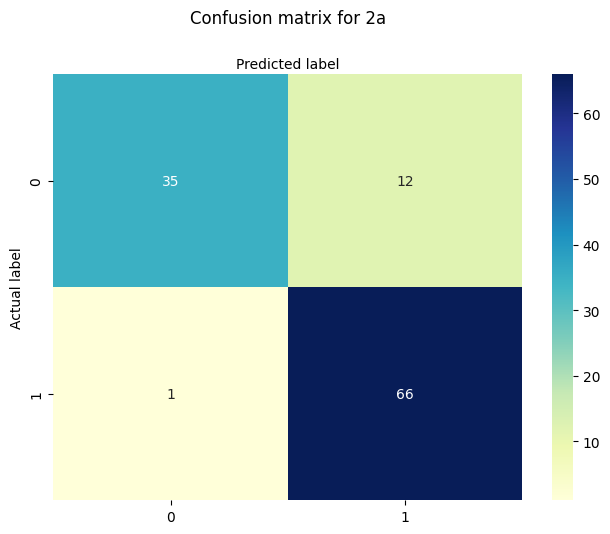

In [3147]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for 2a', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [3148]:
#Pentaly Value
c = 1.0
lr = LogisticRegression(penalty ='l1', C=c, solver='saga')
lr.fit(X_train, Y_train)


# Predicting on the test data
Y_pred_2 = classifier.predict(X_test)
cf_matrix_2 = confusion_matrix(Y_test, Y_pred_2)

# performance
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_2))
print("Precision:",metrics.precision_score(Y_test, Y_pred_2))
print("Recall:",metrics.recall_score(Y_test, Y_pred_2))
print("F1 Score:", metrics.f1_score(Y_test,Y_pred_2))

Accuracy: 0.8859649122807017
Precision: 0.8461538461538461
Recall: 0.9850746268656716
F1 Score: 0.9103448275862068


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0.5, 427.9555555555555, 'Predicted label')

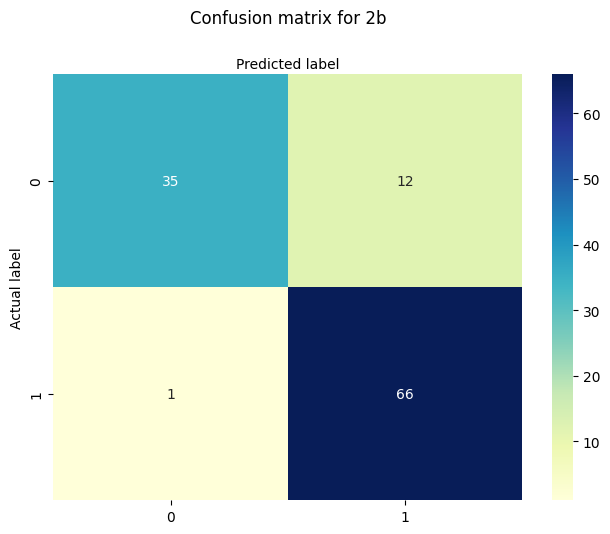

In [3149]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for 2b', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [3150]:
#Problem 3
#Use the cancer dataset to build a naive Bayesian model to classify the type of cancer (Malignant vs. benign).
#Use 80% and 20% split between training# and evaluation (test). Report your classification accuracy, precision, recall, and F1 score.
#Explain and elaborate on your results. Can you compare your results against the logistic regression classifier you did in Problem 2.

In [3151]:
naive = GaussianNB()
naive.fit(X_test, Y_test)
Y_pred_3 = naive.predict(X_test)
cf_matrix_3 = confusion_matrix(Y_test, Y_pred_3)

In [3152]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_3))
print("Precision:",metrics.precision_score(Y_test, Y_pred_3))
print("Recall:",metrics.recall_score(Y_test, Y_pred_3))
print("F1 Score:", metrics.f1_score(Y_test,Y_pred_3))

Accuracy: 0.9298245614035088
Precision: 0.9402985074626866
Recall: 0.9402985074626866
F1 Score: 0.9402985074626865


Text(0.5, 427.9555555555555, 'Predicted label')

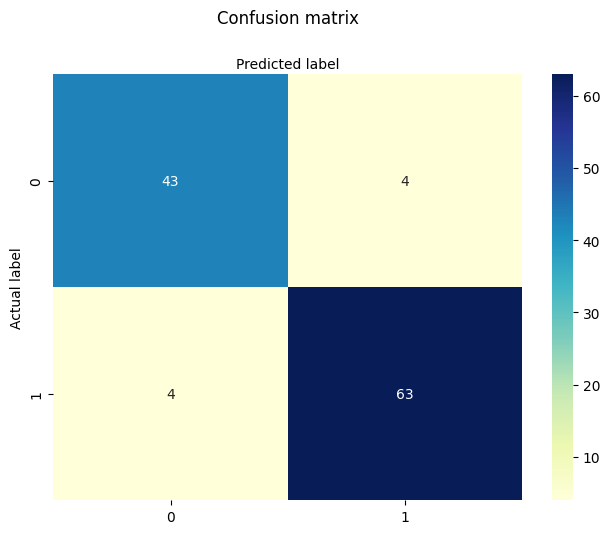

In [3153]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [3154]:
#Problem 4
#Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign).
#Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).
#Identify the optimum number of K, principal components that achieve the highest classification accuracy.
#Report your classification accuracy, precision, recall, and F1 score over a different number of Ks.
#Explain and elaborate on your results and compare them against problems 2 and 3.

In [3155]:
dataset = load_breast_cancer()
input = pd.DataFrame(dataset.data)



In [3156]:

labels = dataset.target
labels = np.reshape(labels,(569,1))
cancer = np.concatenate([input,labels],axis=1)

In [3157]:

cancer = pd.DataFrame(cancer)
features = dataset.feature_names


In [3158]:

features_label = np.append(features,'test')
cancer.columns = features_label


In [3159]:
#X = cancer.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
#Y = cancer.iloc[:,30].values

In [3160]:
#Feature Scaling for better accuracy
scalar_X = StandardScaler()
X = scalar_X.fit_transform(X)

#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 0)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

Y_pred_4 = classifier.predict(X_test)
cf_matrix_4 = confusion_matrix(Y_test, Y_pred_4)

In [3161]:

#Metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred_4)
precision = metrics.precision_score(Y_test, Y_pred_4)
recall = metrics.recall_score(Y_test, Y_pred_4)
f1_score = metrics.f1_score(Y_test,Y_pred_4)

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1_Score:",f1_score)

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1_Score: 0.9701492537313433


In [3162]:
#PCA function
X = cancer.loc[:,features].values
Y = cancer.loc[:,['test']].values
X = StandardScaler().fit_transform(x)

In [3163]:

highest_accuracy = 0.0
overall_accuracies = []

In [3164]:
#K-loop
for k in range(1,15,31):
  pca = PCA(n_components=k)
  principalComponents = pca.fit_transform(x)
  principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
  finaldf = pd.concat([principalDf, cancer[['test']]], axis=1)
  outcome = finaldf.pop("test")

  Xfinal = finaldf.values
  Yfinal = outcome.values
  X_train, X_test, Y_train, Y_test = train_test_split(Xfinal, Yfinal, test_size = 0.2, random_state = 0)
  classifier.fit(X_train, Y_train)

  Y_pred_4 = classifier.predict(X_test)

  cf_matrix_4 = confusion_matrix(Y_test, Y_pred_4)


In [3165]:

#PCA
pca = PCA(n_components=k)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
final_df =pd.concat([principalDf, cancer[['test']]], axis=1)

Xfinal = final_df.values
Yfinal = outcome.values


In [3166]:
Y_pred_4 = classifier.predict(X_test)
cf_matrix_4 = confusion_matrix(Y_test, Y_pred_4)

#Metrics
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred_4))
print("Precision:",metrics.precision_score(Y_test,Y_pred_4))
print("Recall:",metrics.recall_score(Y_test,Y_pred_4))
print("F1 Score:", metrics.f1_score(Y_test,Y_pred_4))
print("Final k: ", k)

Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1 Score: 0.9172932330827067
Final k:  1


Text(0.5, 427.9555555555555, 'Predicted label')

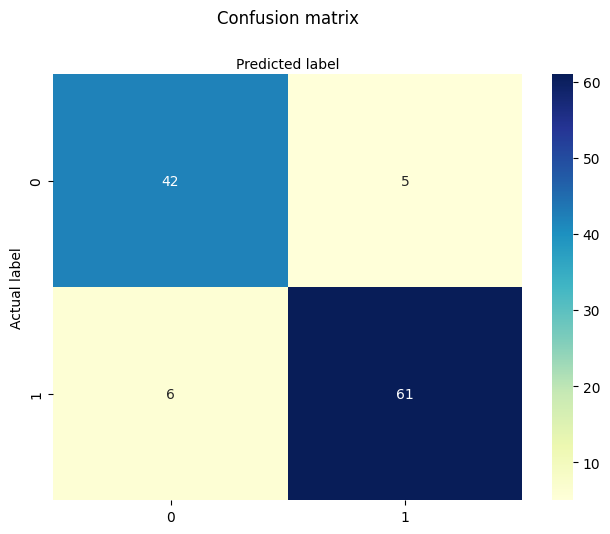

In [3167]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [3168]:
#Probelm 5
#Can you repeat problem 4?
#This time, replace the logistic regression classifier with the Bayes classifier.
#Report your results (classification accuracy, precision, recall and F1 score). Compare your results against problems 2, 3 and 4.

In [3169]:
X = cancer.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
Y = cancer.iloc[:,30].values

In [3170]:
#Feature Scaling for better accuracy
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [3171]:
Y_pred_5 = classifier.predict(X_test)
cf_matrix_5 = confusion_matrix(Y_test, Y_pred_5)

In [3172]:
#Metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred_4)
precision = metrics.precision_score(Y_test, Y_pred_4)
recall = metrics.recall_score(Y_test, Y_pred_4)
f1_score = metrics.f1_score(Y_test,Y_pred_4)

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1_Score:",f1_score)

Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1_Score: 0.9172932330827067


In [3173]:
#PCA function
X = cancer.loc[:,features].values
Y = cancer.loc[:,['test']].values
X = StandardScaler().fit_transform(x)

In [3174]:
highest_accuracy_2 = 0.0
overall_accuracies_2 = []

In [3175]:
#K-loop
for k in range(1,15,31):
  pca = PCA(n_components=k)
  principalComponents = pca.fit_transform(x)
  principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
  finaldf = pd.concat([principalDf, cancer[['test']]], axis=1)
  outcome = finaldf.pop("test")

  Xfinal_2 = finaldf.values
  Yfinal_2 = outcome.values
  X_train, X_test, Y_train, Y_test = train_test_split(Xfinal, Yfinal, test_size = 0.2, random_state = 0)
  classifier.fit(X_train, Y_train)

  Y_pred_5 = classifier.predict(X_test)

  cf_matrix_5 = confusion_matrix(Y_test, Y_pred_5)

In [3176]:
#PCA
pca = PCA(n_components=k)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
final_df =pd.concat([principalDf, cancer[['test']]], axis=1)

Xfinal = final_df.values
Yfinal = outcome.values
X_train, X_test, Y_train, Y_test = train_test_split(Xfinal, Yfinal, test_size = 0.2, random_state = 0)
classifier.fit(X_train, Y_train)

GaussianNB()

In [3177]:
Y_pred_5 = classifier.predict(X_test)
cf_matrix_5 = confusion_matrix(Y_test, Y_pred_5)

#Metrics
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred_5))
print("Precision:",metrics.precision_score(Y_test,Y_pred_5))
print("Recall:",metrics.recall_score(Y_test,Y_pred_5))
print("F1 Score:", metrics.f1_score(Y_test,Y_pred_5))
print("Final k: ", k)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Final k:  1


Text(0.5, 427.9555555555555, 'Predicted label')

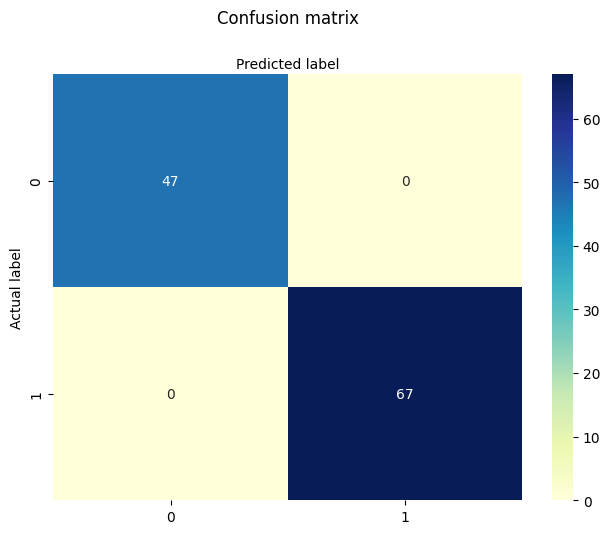

In [3178]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')